In [212]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [213]:
from sklearn.datasets import make_classification

In [214]:
## Create the dataset
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [215]:
x.shape

(1000, 10)

In [216]:
y.shape

(1000,)

In [217]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=22)

In [218]:
# Model Training

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [219]:
y_pred = logistic.predict(x_test)

In [220]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)


0.8833333333333333
[[129  13]
 [ 22 136]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       142
           1       0.91      0.86      0.89       158

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



# Hyperparameter Tuning and Cross Validation

In [221]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_vales = [100,10,1.0,0.1,.01]
solver = ['lbfgs', 'liblinear', 'newton-cg','sag', 'saga']

In [222]:
param=dict(penalty=penalty,C=c_vales,solver=solver)

In [223]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [224]:
### Grid Search Cv

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=cv,n_jobs=-1)


In [225]:
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [226]:
grid.fit(x_train,y_train)

c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\chara\AppD

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [227]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [228]:
grid.best_score_

np.float64(0.8642857142857144)

In [229]:
y_pred=grid.predict(x_test)

In [230]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

0.87
[[129  13]
 [ 26 132]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       142
           1       0.91      0.84      0.87       158

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# Randomised Search CV

In [231]:
from sklearn.model_selection import RandomizedSearchCV


In [232]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model,param_distributions=param,scoring='accuracy',cv=5)

In [233]:
randomcv.fit(x_train,y_train)

c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\chara\AppDat

,estimator,LogisticRegression()
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [234]:
randomcv.best_score_

np.float64(0.8642857142857144)

In [235]:
randomcv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}

In [236]:
y_pred = randomcv.predict(x_test)

In [237]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

0.87
[[129  13]
 [ 26 132]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       142
           1       0.91      0.84      0.87       158

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# Logistic Regression For Multiclass Classification Problem

In [238]:
## Create the dataset
x,y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=42)

In [239]:
x.shape

(1000, 10)

In [240]:
y.shape

(1000,)

In [241]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=22)

In [242]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(multi_class='ovr')
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [243]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

0.63
[[74 14 10]
 [50 34 21]
 [ 5 11 81]]
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        98
           1       0.58      0.32      0.41       105
           2       0.72      0.84      0.78        97

    accuracy                           0.63       300
   macro avg       0.62      0.64      0.61       300
weighted avg       0.62      0.63      0.61       300



# Logistic Regression for Imbalanced Dataset

In [244]:
# Generate and plot a synthetic imbalanced classification dataset

from collections import Counter
from sklearn.datasets import make_classification

In [245]:
## imbalanced dataset
x,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)


In [246]:
x.shape

(10000, 2)

In [247]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [248]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [249]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [250]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [251]:
# Hyperparameter tuning

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_vales = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [252]:
params = dict(penalty=penalty,C=c_vales,solver=solver,class_weight=class_weight)

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [254]:
grid.fit(x_train,y_train)

c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [255]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [256]:
y_pred = grid.predict(x_test)

In [257]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



# Logistic Regression with ROC curve and ROC AUC Score

In [258]:
# roc curve and auc

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [259]:
# generate 2 class dataset

x,y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [260]:
# split the dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [261]:
## created a dummmy model with default value 0 (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [262]:
## Lets Create Basic Logistic Model

model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [263]:
## Prediction based on probability

model_prob = model.predict_proba(x_test)


In [264]:
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [265]:
# Lets focus on the positive outcome

model_prob = model_prob[:,1]

In [266]:
# Lets calculate the scores

dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [271]:
## calculate ROC curve

dummy_fpr, dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr,thresholds = roc_curve(y_test,model_prob)

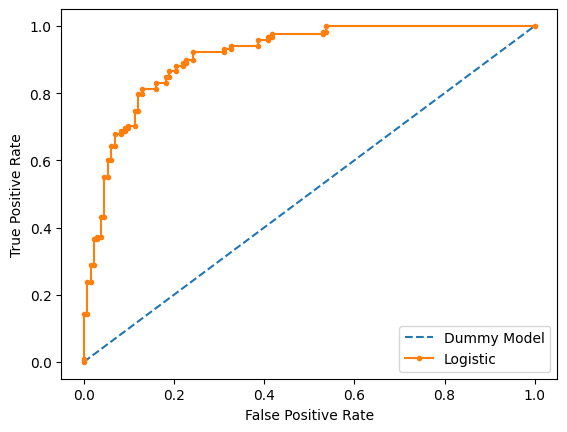

In [276]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_23064\3955367373.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


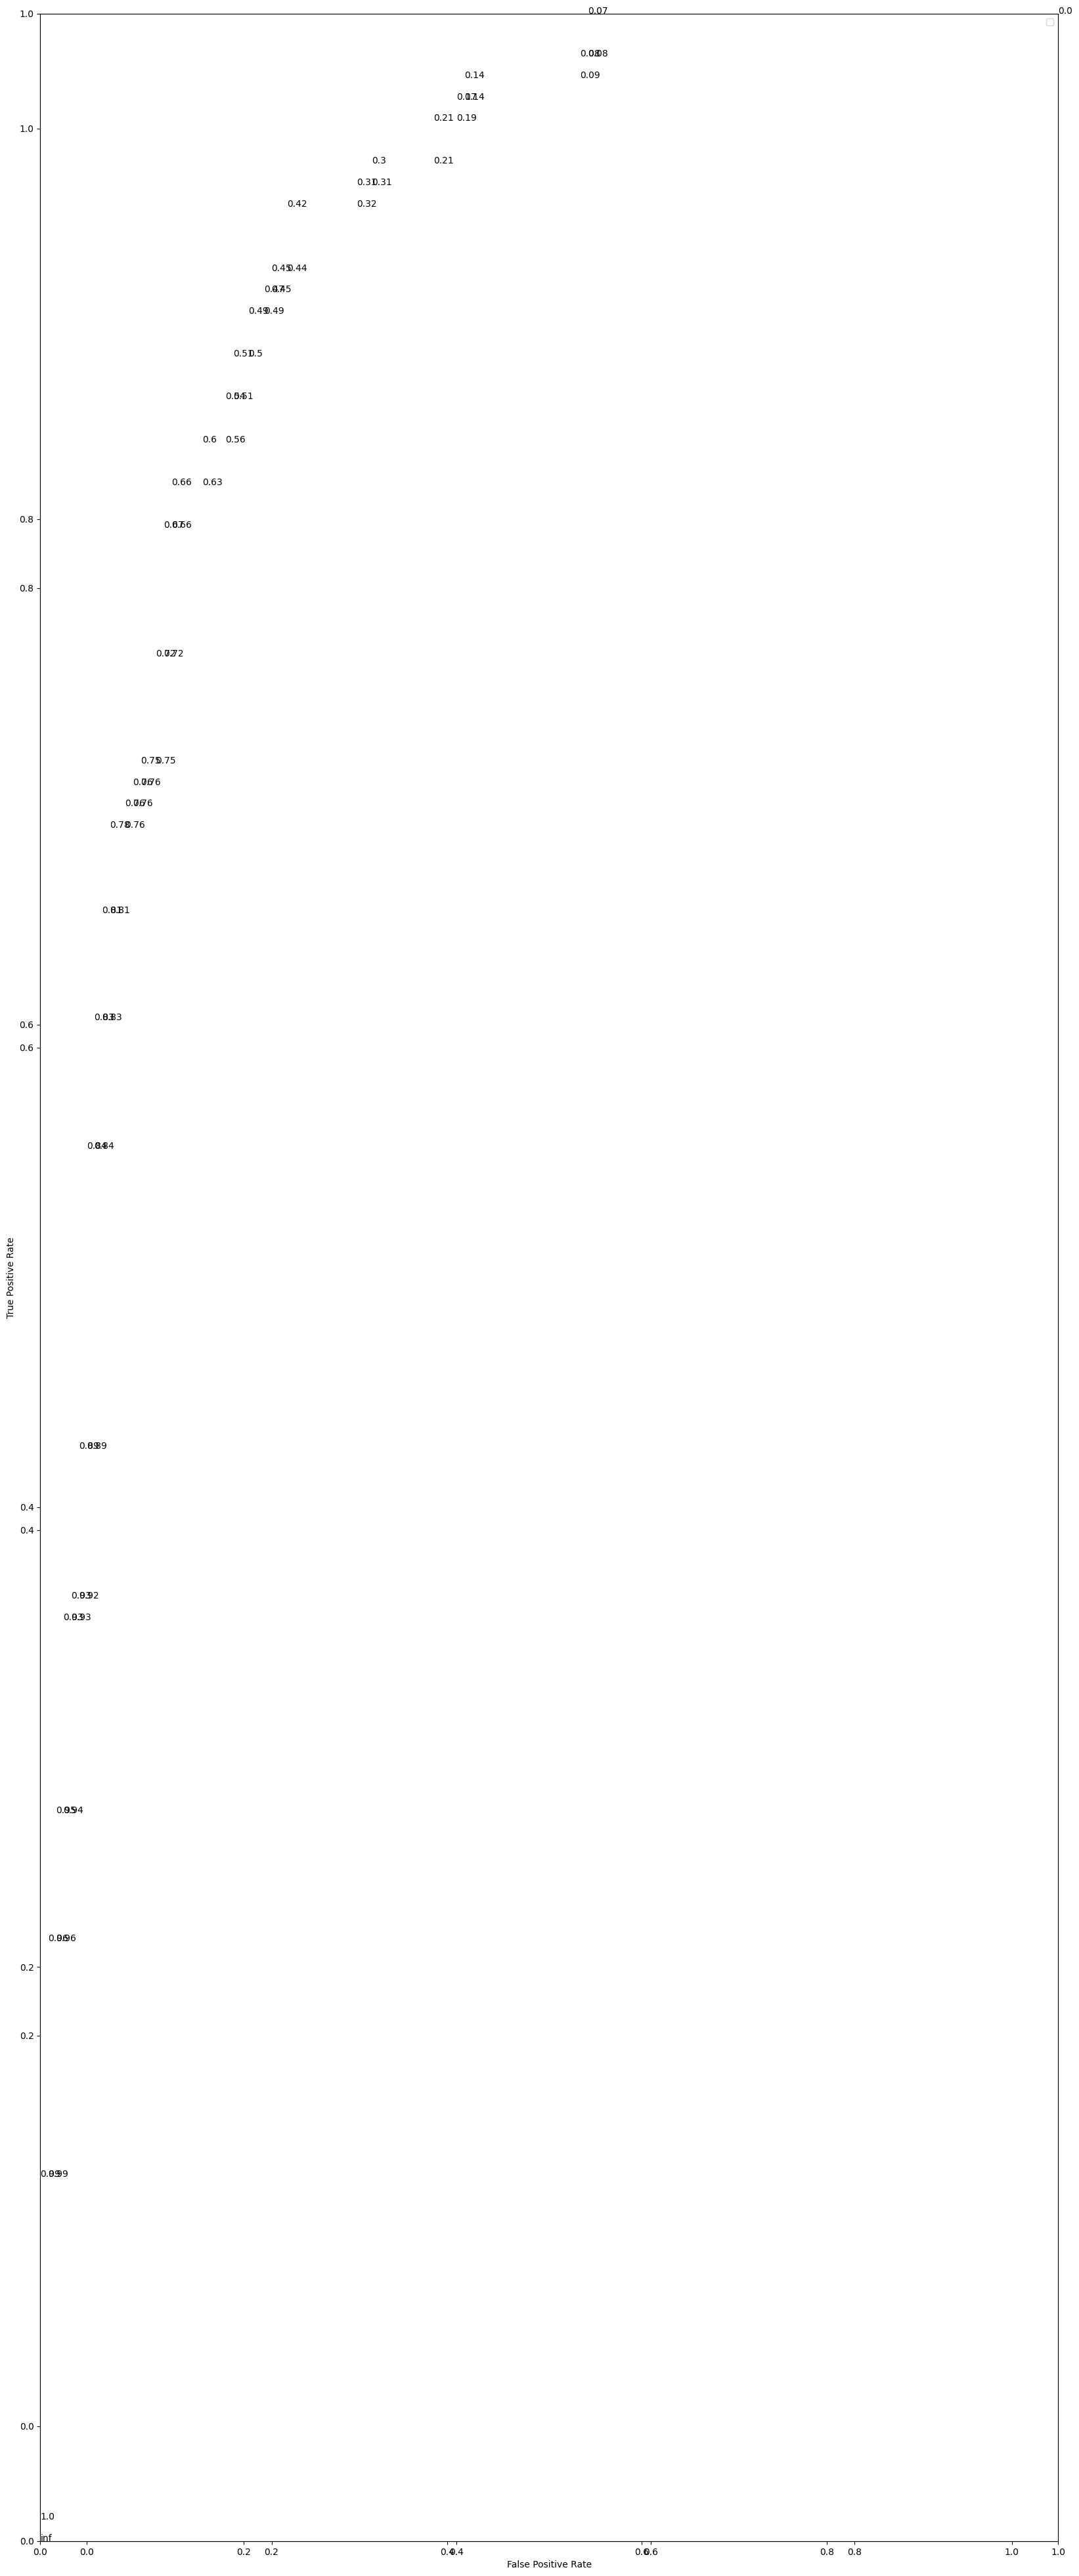

In [277]:
# plot the roc curve for the model

import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' %np.round(xyz[2],2),xy=(xyz[0],xyz[1]))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# Show the legend
pyplot.legend()
# show the plot
pyplot.show()